**Hồi Quy Logistic**

1. Tải dữ liệu
2. Tạo biến Y=0 nếu giá CK giảm và biến Y=1 nếu giá CK tăng.
3. Sử dụng hàm LogisticRegression từ thư viện sklearn

**VCB**

In [1]:
import pandas as pd
# Đọc dữ liệu từ file CSV (có thể thay bằng file của bạn)
#df = pd.read_csv('VCB_hose.csv')
file_path = r'D:\DeTaiNam2024\SolieuHong\VCB.csv'
df = pd.read_csv(file_path)
# Kiểm tra tiêu đề các cột
df.head()


,Unnamed: 0,time,open,high,low,close,volume
0,0,2015-01-05,14.03,14.21,13.90,14.12,310010
1,1,2015-01-06,14.12,15.05,14.12,15.05,1684600
2,2,2015-01-07,15.09,15.31,14.65,14.87,1430340
3,3,2015-01-08,14.92,15.49,14.87,15.31,904240
4,4,2015-01-09,15.45,16.38,15.45,16.33,2286680


In [2]:
# Sắp xếp theo ngày
df = df.sort_values('time')

# Tạo cột Y: nếu giá đóng cửa hôm nay thấp hơn hôm qua, Y=0, nếu ngược lại Y=1
df['Y'] = (df['close'].diff() > 0).astype(int)

# Hiển thị dữ liệu với cột Y
print(df[['time', 'close', 'Y']])

            time  close  Y
0     2015-01-05  14.12  0
1     2015-01-06  15.05  1
2     2015-01-07  14.87  0
3     2015-01-08  15.31  1
4     2015-01-09  16.33  1
...          ...    ... ..
2421  2024-09-13  89.90  1
2422  2024-09-16  88.90  0
2423  2024-09-17  90.50  1
2424  2024-09-18  91.00  1
2425  2024-09-19  91.60  1

[2426 rows x 3 columns]


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Tạo các đặc trưng (ở đây ta chỉ sử dụng giá hôm trước và khối lượng giao dịch)
# Shift dữ liệu Close để lấy giá của ngày trước làm đặc trưng
df['Close_lag1'] = df['close'].shift(1)
df['Volume_lag1'] = df['volume'].shift(1)

# Loại bỏ các hàng chứa giá trị NaN
df.dropna(inplace=True)

# Chọn các đặc trưng (X) và mục tiêu (Y)
X = df[['Close_lag1', 'Volume_lag1']]
Y = df['Y']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Bắt đầu tính thời gian huấn luyện
start_time = time.time()
# Khởi tạo mô hình hồi quy logistic
model = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, Y_train)
# Kết thúc tính thời gian huấn luyện
train_time_cls = time.time() - start_time
print(f'Thời gian huấn luyện mô hình phân loại: {train_time_cls:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)
# Kết thúc tính thời gian huấn luyện
train_time_cls = time.time() - start_time
print(f'Thời gian huấn luyện mô hình phân loại: {train_time_cls:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()

# Đánh giá mô hình
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Báo cáo chi tiết kết quả dự đoán
print(classification_report(Y_test, Y_pred))


Thời gian huấn luyện mô hình phân loại: 0.0271 giây
Thời gian huấn luyện mô hình phân loại: 0.0030 giây
Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       265
           1       0.00      0.00      0.00       220

    accuracy                           0.55       485
   macro avg       0.27      0.50      0.35       485
weighted avg       0.30      0.55      0.39       485



C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


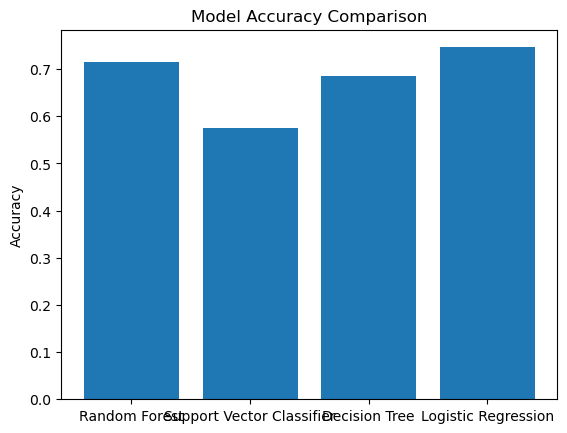

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Chọn các đặc trưng (features)
features = df[['open', 'high', 'low', 'close', 'volume']]
target = df['Y']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo các mô hình
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

results = {}

# Huấn luyện và dự đoán cho từng mô hình
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# In kết quả ra file
with open('model_comparison.csv', 'w') as f:
    for model_name, result in results.items():
        f.write(f"Model: {model_name}\n")
        f.write(f"Classification Report:\n{result['report']}\n")
        f.write(f"Confusion Matrix:\n{result['confusion_matrix']}\n\n")

# Vẽ biểu đồ so sánh
metrics = {}
for model_name, result in results.items():
    metrics[model_name] = result['report']['accuracy']
   
plt.bar(metrics.keys(), metrics.values())
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.savefig('model_accuracy_comparison.png')
plt.show()

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


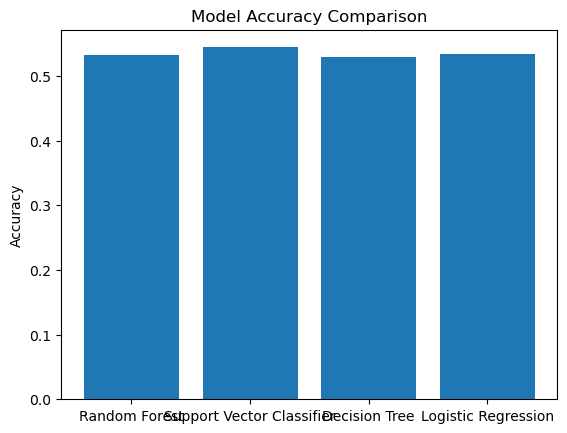

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Shift dữ liệu Close để lấy giá của ngày trước làm đặc trưng
df['Close_lag1'] = df['close'].shift(1)
df['Volume_lag1'] = df['volume'].shift(1)

# Loại bỏ các hàng chứa giá trị NaN
df.dropna(inplace=True)

# Chọn các đặc trưng (X) và mục tiêu (Y)
X = df[['Close_lag1', 'Volume_lag1']]
Y = df['Y']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo các mô hình
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

results = {}

# Huấn luyện và dự đoán cho từng mô hình
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# In kết quả ra file
with open('model_comparison.csv', 'w') as f:
    for model_name, result in results.items():
        f.write(f"Model: {model_name}\n")
        f.write(f"Classification Report:\n{result['report']}\n")
        f.write(f"Confusion Matrix:\n{result['confusion_matrix']}\n\n")

# Vẽ biểu đồ so sánh
metrics = {}
for model_name, result in results.items():
    metrics[model_name] = result['report']['accuracy']
   
plt.bar(metrics.keys(), metrics.values())
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.savefig('model_accuracy_comparison.png')
plt.show()